<h2>想定</h2>
<h3>どのような顧客がいるのかを分析してほしいという分析要求を満たしたい

In [44]:
import requests,zipfile
import io 
import pandas as pd 
import numpy as np 
import numpy.random as random 
import scipy as sp

import matplotlib.pyplot as plt 
import seaborn as sns 
%matplotlib inline 

%precision 3

zip_file_url = 'https://archive.ics.uci.edu/ml/machine-learning-databases/00222/bank.zip'

In [45]:
r = requests.get(zip_file_url)
z = zipfile.ZipFile(io.BytesIO(r.content))
z.extractall()

In [46]:
bank = pd.read_csv('bank-full.csv',sep=';')

In [47]:
bank.head()

,age,job,marital,education,default,balance,housing,loan,contact,day,month,duration,campaign,pdays,previous,poutcome,y
0,58,management,married,tertiary,no,2143,yes,no,unknown,5,may,261,1,-1,0,unknown,no
1,44,technician,single,secondary,no,29,yes,no,unknown,5,may,151,1,-1,0,unknown,no
2,33,entrepreneur,married,secondary,no,2,yes,yes,unknown,5,may,76,1,-1,0,unknown,no
3,47,blue-collar,married,unknown,no,1506,yes,no,unknown,5,may,92,1,-1,0,unknown,no
4,33,unknown,single,unknown,no,1,no,no,unknown,5,may,198,1,-1,0,unknown,no


In [48]:
bank.isnull().sum()

age          0
job          0
marital      0
education    0
default      0
balance      0
housing      0
loan         0
contact      0
day          0
month        0
duration     0
campaign     0
pdays        0
previous     0
poutcome     0
y            0
dtype: int64

In [49]:
bank.shape

(45211, 17)

In [50]:
from sklearn.preprocessing import StandardScaler 

bank_sub = bank[['age','balance','campaign','previous']]

In [51]:
sc = StandardScaler()
sc.fit(bank_sub)
bank_sub_std = sc.transform(bank_sub)
bank_sub.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 45211 entries, 0 to 45210
Data columns (total 4 columns):
age         45211 non-null int64
balance     45211 non-null int64
campaign    45211 non-null int64
previous    45211 non-null int64
dtypes: int64(4)
memory usage: 1.4 MB


C:\Users\mkou0\AppData\Local\Continuum\anaconda3\lib\site-packages\sklearn\preprocessing\data.py:645: DataConversionWarning: Data with input dtype int64 were all converted to float64 by StandardScaler.
  return self.partial_fit(X, y)
C:\Users\mkou0\AppData\Local\Continuum\anaconda3\lib\site-packages\ipykernel_launcher.py:3: DataConversionWarning: Data with input dtype int64 were all converted to float64 by StandardScaler.
  This is separate from the ipykernel package so we can avoid doing imports until


In [40]:
from sklearn.cluster import KMeans

kmeans = KMeans(init='random',n_clusters = 6,random_state=0)

kmeans.fit(bank_sub_std)

labels = pd.Series(kmeans.labels_,name='cluster_number')

print(labels.value_counts(sort=False))

0    24509
1      221
2     2684
3     1380
4    14734
5     1683
Name: cluster_number, dtype: int64


Text(0, 0.5, 'count')

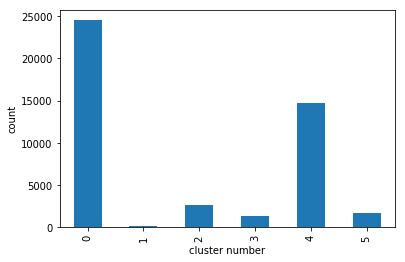

In [41]:
ax = labels.value_counts(sort=False).plot(kind='bar')
ax.set_xlabel('cluster number')
ax.set_ylabel('count')

Text(0, 0.5, 'Distortion')

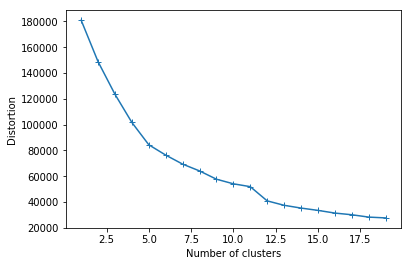

In [54]:
#エルボー法によるクラスター数の最適数を推定する
dist_list = []
for i in range(1,20):
    kmeans = KMeans(n_clusters=i,init='random',random_state=0)
    kmeans.fit(bank_sub_std)
    dist_list.append(kmeans.inertia_)

plt.plot(range(1,20),dist_list,marker='+')
plt.xlabel('Number of clusters')
plt.ylabel('Distortion')